## Machine Learning Engineer Nanodegree
## Project: Capstone Project

# Dataset and Inputs

## Dataset:

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

__bank-additional-full.csv__ with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]


## Attribute Information:

### Input variables:

#### bank client data:

1.	age (numeric)
2.	job: type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
3.	marital: marital status (categorical: 'divorced', 'married', 'single', 'unknown'; note: 'divorced' means divorced or widowed)
4.	education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
5.	default: has credit in default? (categorical: 'no', 'yes', 'unknown')
6.	housing: has housing loan? (categorical: 'no', 'yes', 'unknown')
7.	loan: has personal loan? (categorical: 'no', 'yes', 'unknown')

#### related with the last contact of the current campaign:

8.	contact: contact communication type (categorical: 'cellular', 'telephone') 
9.	month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10.	day_of_week: last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')
11.	duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

#### Other attributes:

12.	campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13.	pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14.	previous: number of contacts performed before this campaign and for this client (numeric)
15.	poutcome: outcome of the previous marketing campaign (categorical: 'failure', 'nonexistent', 'success')

#### social and economic context attributes

16.	emp.var.rate: employment variation rate - quarterly indicator (numeric)
17.	cons.price.idx: consumer price index - monthly indicator (numeric) 
18.	cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19.	euribor3m: euribor 3 month rate - daily indicator (numeric)
20.	nr.employed: number of employees - quarterly indicator (numeric)

### Output variable (desired target):

21.	y - has the client subscribed a term deposit? (binary: 'yes', 'no')

## Data exploration

I will first load the necessary Python libraries and load the marketing campaign data. The last column from this dataset, 'y', will be my target label (whether an individual subscribes to the term deposit (yes/no). All other columns are features about each individual in the marketing campaign database.

A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals that purchased the product in a previous campaign.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals_capstone.py
import visuals_capstone as vs

# Display for notebooks
%matplotlib inline

# Load the Bank dataset
data = pd.read_csv("bank-additional-full.csv", sep = ";")

# Display the first 10 records
display(data.head(n=10))

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Below I take a quick look at the dataset to determine how many individuals fit into either group (subscribes to the term deposit or not), as well as other things such as:

- Total number of records, `'n_records'`.
- Number of records where the individual has a credit in default, `'n_default'`.
- Number of records where the individual has a housing loan, `'n_housing'`.
- Number of records where the individual has a personal loan, `'n_loan'`.
- Number of records where the individual purchased the product in a previous campaign, `'n_success'`.
- Percentage of individuals that purchased the product in a previous campaign, `'success_percent'`.

In [2]:
# Total number of records
n_records = len(data.index)

# Number of records where the individual has a credit in default
n_default = len(data[data["default"]=='yes'])

# Number of records where the individual has a housing loan
n_housing = len(data[data["housing"]=='yes'])

# Number of records where the individual has a personal loan
n_loan = len(data[data["loan"]=='yes'])

# Number of records where the individual purchased the product in a previous campaign
n_success = len(data[data["y"]=='yes'])

# Percentage of individuals that purchased the product in a previous campaign
success_percent = (n_success / n_records) * 100

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals with credit in default: {}".format(n_default))
print("Individuals with a housing loan: {}".format(n_housing))
print("Individuals with a personal loan: {}".format(n_loan))
print("Individuals that purchased the product in a previous campaign: {}".format(n_success))
print("Percentage of individuals that purchased the product in a previous campaign: {}%".format(success_percent))

Total number of records: 41188
Individuals with credit in default: 3
Individuals with a housing loan: 21576
Individuals with a personal loan: 6248
Individuals that purchased the product in a previous campaign: 4640
Percentage of individuals that purchased the product in a previous campaign: 11.265417111780131%


## Data preparation

Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as preprocessing. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features

A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number. Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the marketing campaign dataset two features fit this description: '`age`' and '`campaign`'.

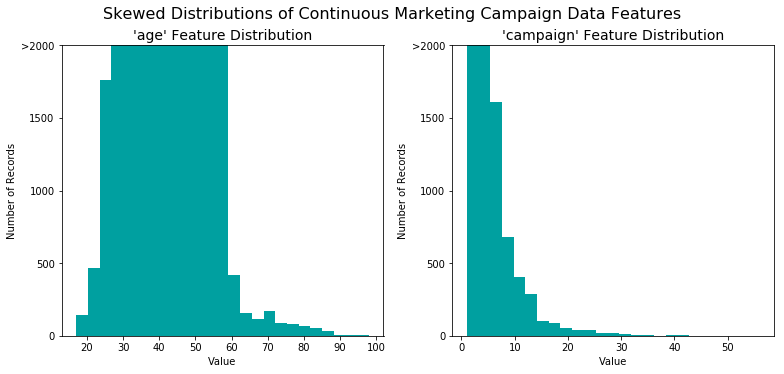

In [3]:
# Split the data into features and target label
label_raw = data['y']
features_raw = data.drop('y', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as '`age`' and '`campaign`', it is common practice to apply a logarithmic transformation on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the logarithm successfully.

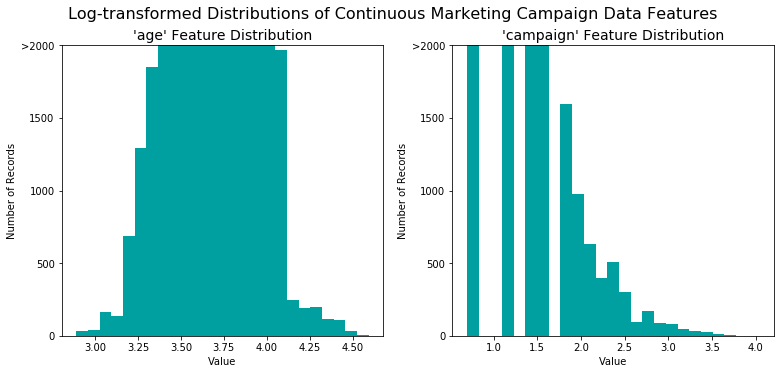

In [4]:
# Log-transform the skewed features
skewed = ['age', 'campaign']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

### Scaling from numerical variables

In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'age'` or `'campaign'` above); however, normalization ensures that each feature is treated equally when applying supervised learners.

In [5]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 
             'cons.conf.idx', 'euribor3m', 'nr.employed']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.676158,housemaid,married,basic.4y,no,no,no,telephone,may,mon,0.053070,0.0,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735
1,0.686360,services,married,high.school,unknown,no,no,telephone,may,mon,0.030297,0.0,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735
2,0.438314,services,married,high.school,no,yes,no,telephone,may,mon,0.045954,0.0,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735
3,0.482887,admin.,married,basic.6y,no,no,no,telephone,may,mon,0.030704,0.0,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735
4,0.676158,services,married,high.school,no,no,yes,telephone,may,mon,0.062424,0.0,1.0,0.0,nonexistent,0.9375,0.698753,0.60251,0.957379,0.859735


### Encoding categorical variables

Learning algorithms expect input to be numeric, which requires that non-numeric features or categorical variables be converted. I will use one-hot encoding to create "dummy" variables for each possible category of each non-numeric feature.

Also, as with the non-numeric features, I will convert the non-numeric target label, `'label'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("yes" and "no"), I don’t need to use one-hot encoding and can instead simply encode these two categories as `0` and `1`, respectively.

In [6]:
# One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform)

# Encode the 'label_raw' data to numerical values
label = label_raw.apply(lambda x: 1 if x == "yes" else 0)

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

63 total features after one-hot encoding.


### Data shuffle and split

Now all categorical variables have been converted into numerical features, and all numerical features have been normalized. I will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

In [7]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'y' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    label, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 32950 samples.
Testing set has 8238 samples.


C:\Users\Persapiens\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Six model comparison

### Evaluating model performance

In this section, I will investigate six different algorithms with their default hyper parameters, and determine which is best at modeling the data.

Those algorithms are:

* Gaussian Naive Bayes (GaussianNB)
* Ensemble Methods (AdaBoostClassifier and GradientBoostingClassifier)
* K-Nearest Neighbors (KNeighborsClassifier)
* Support Vector Machines (SVC)
* Neural Network (MLPClassifier)

### Naive predictor performance

I am now going to generate a naive predictor to determine what its base model without any intelligence would look like. Ideally my base model would be either the results of a previous model or could be based on a research paper upon which I am looking to improve. I am using this because it is better than random choice as a benchmark and because I don't have a benchmark model set.

In [8]:
# Counting the ones as this is the naive case. Note that 'label' is the 'label_raw' data
TP = np.sum(label)

# encoded to numerical values done in the data preprocessing step.
FP = label.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case

# Calculate accuracy, precision and recall
accuracy = (TP + TN) / (TP + FP + TN + FN)
recall = TP / (TP + FN)
precision = TP / (TP + FP)

# Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
fscore = (1 + 0.5**2) * ((precision * recall) /((0.5**2 * precision) + recall))

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.1127, F-score: 0.1370]


### Training and predicting pipeline

To properly evaluate the performance of each model I've chosen, I will create below a training and predicting pipeline to quickly and effectively train models using various sizes of training data and perform predictions on the testing data.

In [9]:
# Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score


def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: 'y' training set
       - X_test: features testing set
       - y_test: 'y' testing set
    '''
    
    results = {}
    
    # Fit the learner to training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end - start
        
    # Get the predictions on the test set(X_test),
    # then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # Calculate the total prediction time
    results['pred_time'] = end - start
            
    # Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta = 0.5)
        
    # Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta = 0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

### Initial model evaluation

I will first import the six supervised learning models I have chosen. Then I will initialize the models and store them in `'clf_A'`, `'clf_B'`, `'clf_C'`, `'clf_D'`, `'clf_E'` and `'clf_F'`. After that I will calculate the number of records equal to 1%, 10%, and 100% of the training data and store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively. Last but not least, I will collect the results on the learners and display the results.


In [10]:
# Import the six supervised learning models from sklearn
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

# Initialize the six models
clf_A = SVC(random_state = 0)
clf_B = KNeighborsClassifier()
clf_C = AdaBoostClassifier(random_state = 0)
clf_D = MLPClassifier(random_state = 0)
clf_E = GradientBoostingClassifier()
clf_F = GaussianNB()

# Calculate the number of samples for 1%, 10%, and 100% of the training data
# samples_100 is the entire training set i.e. len(y_train)
# samples_10 is 10% of samples_100
# samples_1 is 1% of samples_100
samples_100 = int(len(y_train))
samples_10 = int(samples_100 / 10)
samples_1 = int(samples_100 / 100)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C, clf_D, clf_E, clf_F]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Display results
results

C:\Users\Persapiens\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


SVC trained on 329 samples.
SVC trained on 3295 samples.
SVC trained on 32950 samples.
KNeighborsClassifier trained on 329 samples.
KNeighborsClassifier trained on 3295 samples.
KNeighborsClassifier trained on 32950 samples.
AdaBoostClassifier trained on 329 samples.
AdaBoostClassifier trained on 3295 samples.
AdaBoostClassifier trained on 32950 samples.


C:\Users\Persapiens\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier trained on 329 samples.
MLPClassifier trained on 3295 samples.
MLPClassifier trained on 32950 samples.
GradientBoostingClassifier trained on 329 samples.
GradientBoostingClassifier trained on 3295 samples.
GradientBoostingClassifier trained on 32950 samples.
GaussianNB trained on 329 samples.
GaussianNB trained on 3295 samples.
GaussianNB trained on 32950 samples.


{'SVC': {0: {'train_time': 0.004987001419067383,
   'pred_time': 0.08873939514160156,
   'acc_train': 0.85,
   'acc_test': 0.888443797038116,
   'f_train': 0.0,
   'f_test': 0.0},
  1: {'train_time': 0.31415414810180664,
   'pred_time': 0.5864813327789307,
   'acc_train': 0.85,
   'acc_test': 0.8977907259043457,
   'f_train': 0.36697247706422015,
   'f_test': 0.4351069119840875},
  2: {'train_time': 29.07521414756775,
   'pred_time': 4.636473655700684,
   'acc_train': 0.85,
   'acc_test': 0.8977907259043457,
   'f_train': 0.36697247706422015,
   'f_test': 0.43585933630510154}},
 'KNeighborsClassifier': {0: {'train_time': 0.0009965896606445312,
   'pred_time': 0.27539491653442383,
   'acc_train': 0.8833333333333333,
   'acc_test': 0.8828599174556931,
   'f_train': 0.594059405940594,
   'f_test': 0.268733850129199},
  1: {'train_time': 0.019945859909057617,
   'pred_time': 2.294645309448242,
   'acc_train': 0.8633333333333333,
   'acc_test': 0.8903860160233066,
   'f_train': 0.4700854700

I will choose from the six supervised learning models the best model to use on the marketing campaign data based on which of them had the highest f-score; which was the Gradient Boosting Classifier.

### Best model optimization

I will now perform a grid search optimization for the model over the entire training set (X_train and y_train) by tuning several parameters to improve upon the untuned model's accuracy and F-score.

In [11]:
# Import 'GridSearchCV' and 'make_scorer'
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer

# Initialize the classifier
clf = GradientBoostingClassifier()

# Create the parameters list you wish to tune, using a dictionary if needed.
parameters = {'max_depth': [5], 'learning_rate': [0.05], 'n_estimators': [130], 'random_state': [3]}

# Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta = 0.5)

# Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scorer)

# Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model")
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model")
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print (grid_obj.best_params_)

C:\Users\Persapiens\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Unoptimized model
F-score on testing data: 0.6632

Optimized Model
Final F-score on the testing data: 0.6655
{'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 130, 'random_state': 3}


### Final Model Evaluation

The optimized model’s f-score on the testing data is 0.6655; which is only slightly better than its unoptimized f-score of 0.6632. The optimized model’s f-score is however, significantly better than its naive predictor counterpart of 0.1370.

## Feature selection

An important task when performing supervised learning on a dataset like the marketing campaign data, is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label I can simplify my understanding of the phenomenon. For this reason, I will identify a small number of features that most strongly predict whether a client will subscribe to a term deposit.

### Extracting feature importance

There are twenty available features for each individual on record in the marketing campaign data. I will train the supervised model on the entire training set and then use the `feature_importance_` attribute from `scikit-learn` to rank the importance of each feature when making predictions based on the chosen algorithm. Of these twenty features, I will find the five features most important for prediction in order of importance.

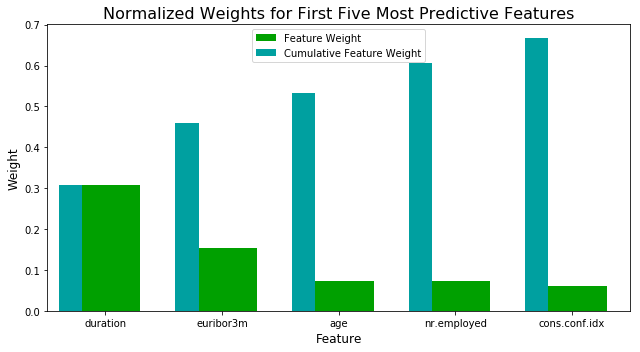

In [12]:
# Train the supervised model on the training set using .fit(X_train, y_train)
model = GradientBoostingClassifier(random_state = 3).fit(X_train, y_train)

# Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. Below I will use the same optimized model from earlier, and train it on the same training set *with only the top five important features*. 

In [13]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data")
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data")
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
F-score on testing data: 0.6655

Final Model trained on reduced data
F-score on testing data: 0.6373


### Model performance with select features

Both the model trained on the full data and the one trained on the five most important features are well suited for the data as indicated by their respective f-scores listed above. As expected, there was a slight decrease in the model’s f-score after removing 15 out of the original 20 variables. However, it is impressive that using only 5 of the original 20 variables, still produced a significant f-score. If training time was a factor the reduced model's results with such a high f-score in comparison to the full model, might prove to be a well suited and efficient model in the production setting.